In [1]:
import networkx as nx
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [3]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

Graph of the political blog network

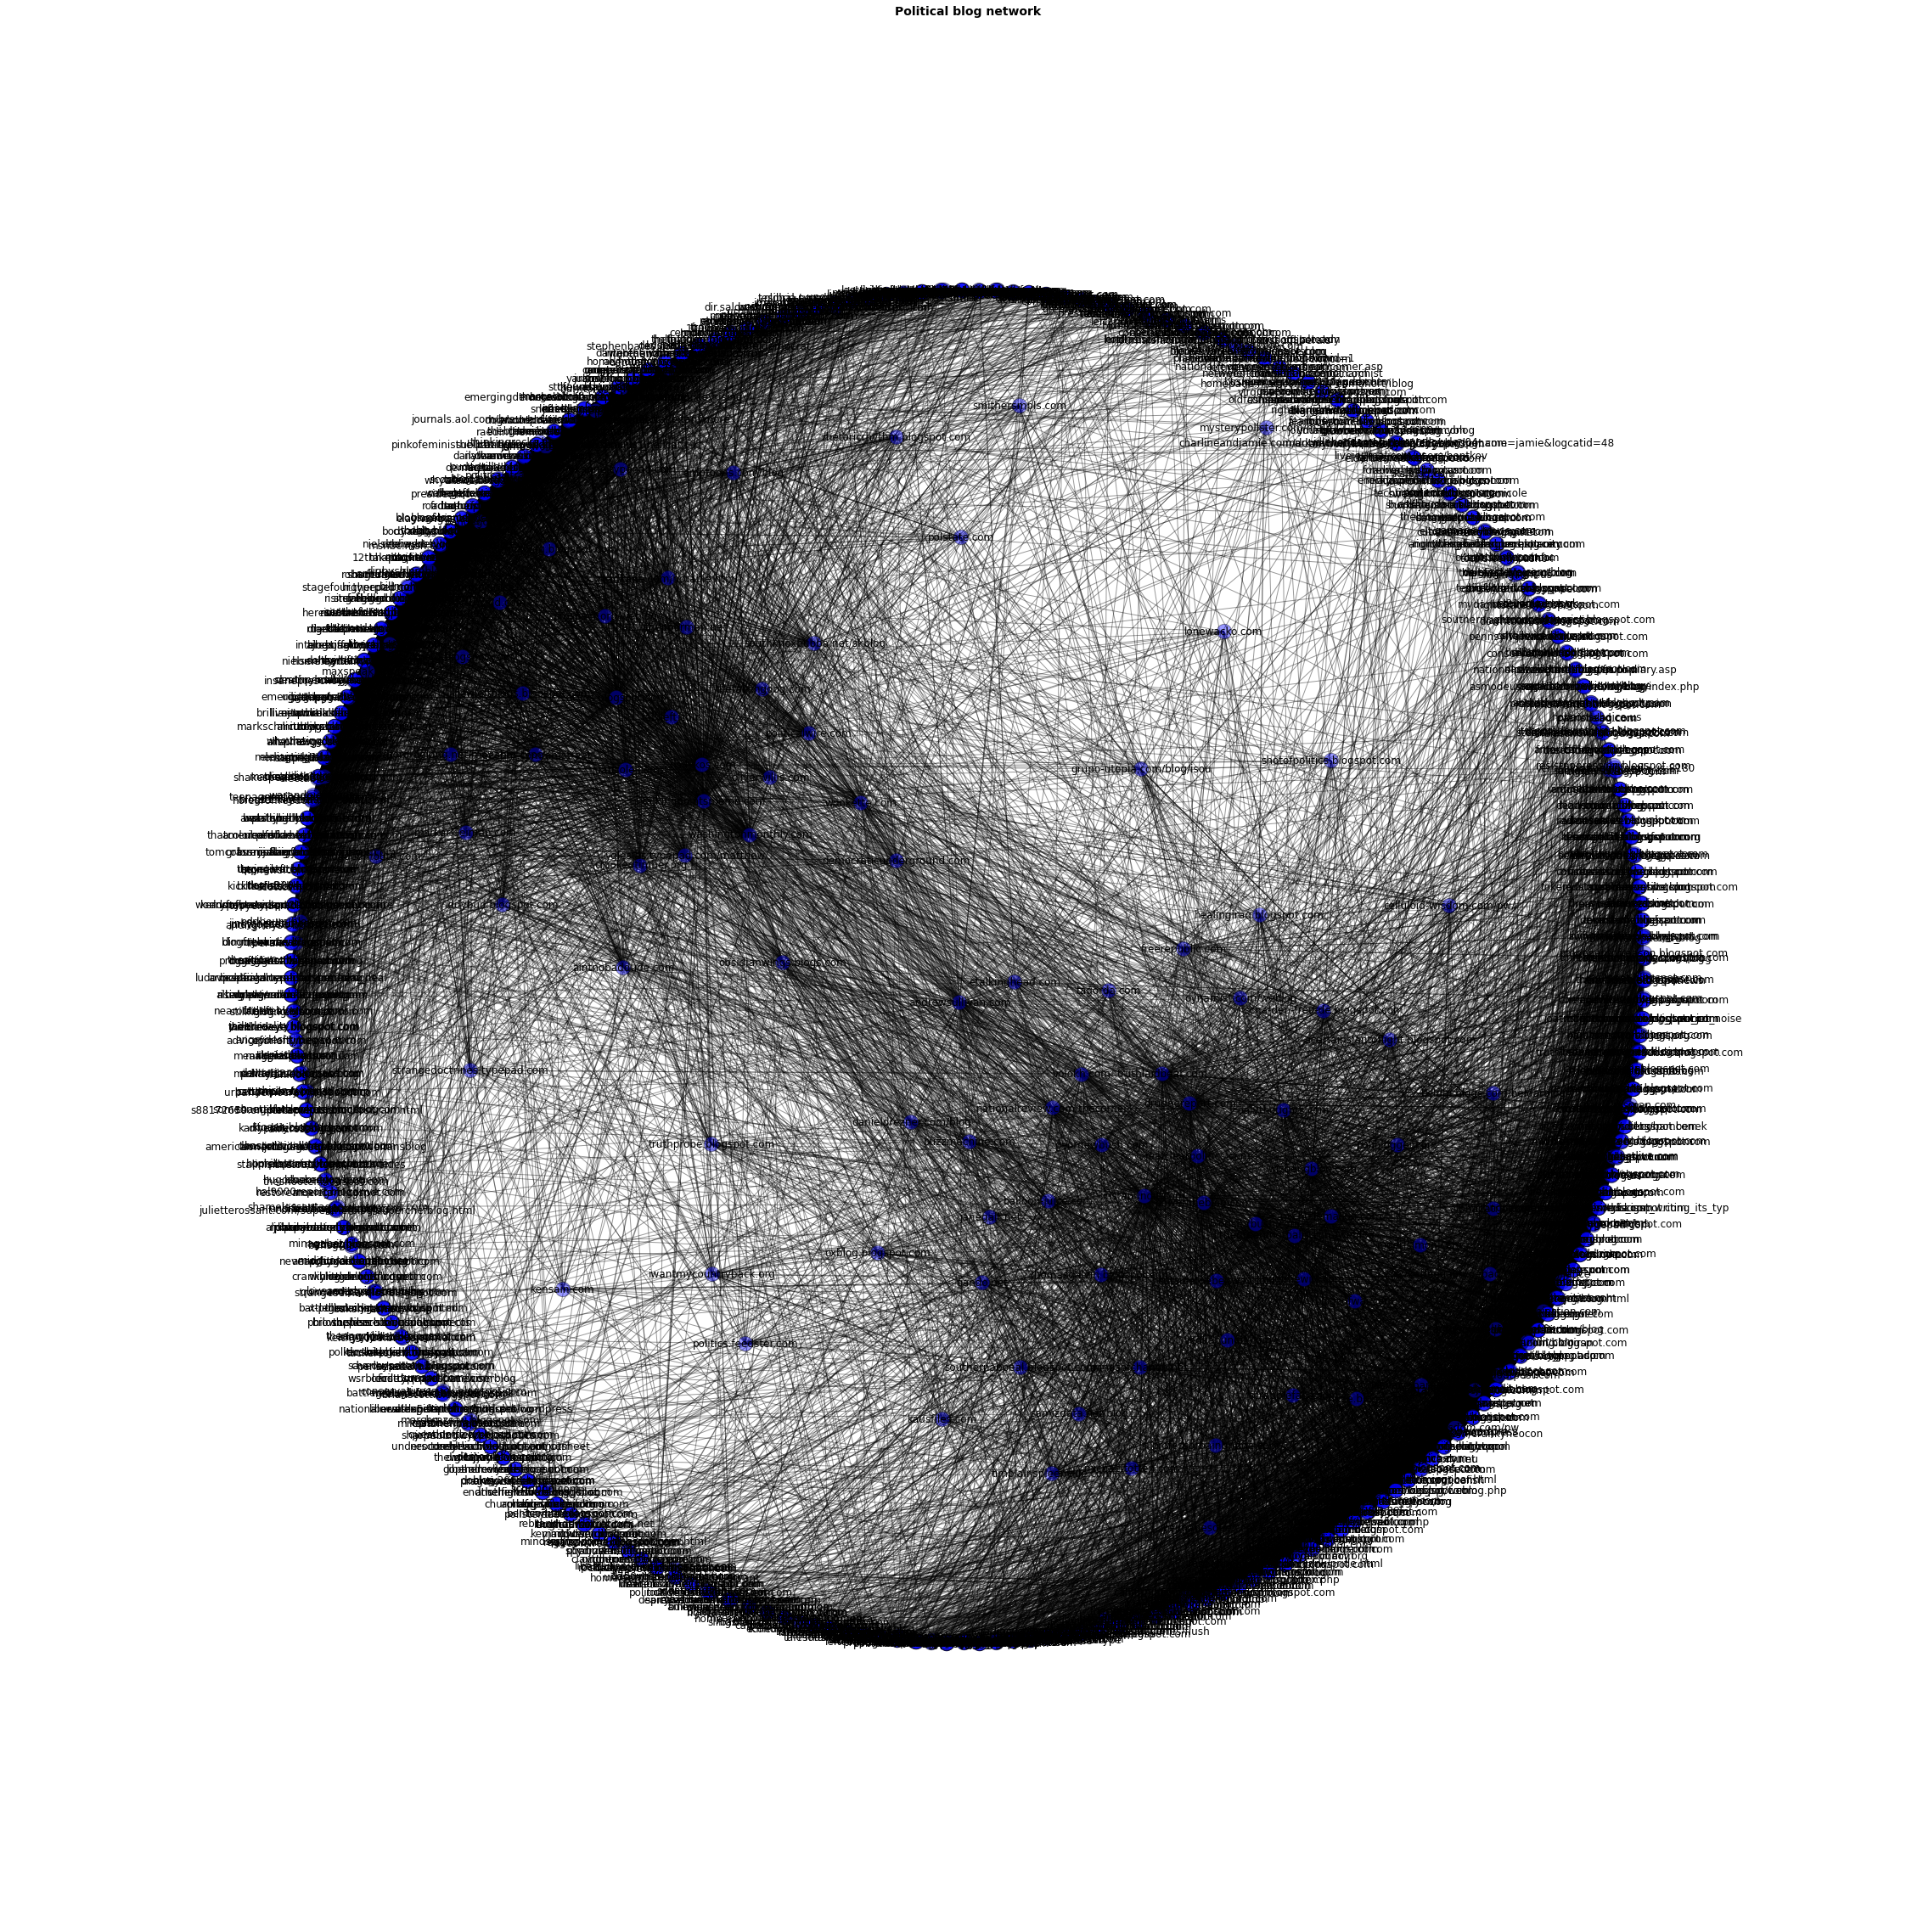

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Bitstream Vera Sans',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political blog network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [5]:
centrality=nx.eigenvector_centrality(G)

In [6]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])


In [7]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.19480797936637706),
 (u'dailykos.com', 0.16089740205234826),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718307),
 (u'bodyandsoul.typepad.com', 0.14113489174330357),
 (u'liberaloasis.com', 0.13952371571107866),
 (u'tbogg.blogspot.com', 0.13703641699824254),
 (u'corrente.blogspot.com', 0.12941759274096146),
 (u'talkingpointsmemo.com', 0.12700519780790948),
 (u'dneiwert.blogspot.com', 0.12237564692546014),
 (u'pandagon.net', 0.12183624597295234),
 (u'billmon.org', 0.117495198741714),
 (u'xnerg.blogspot.com', 0.11480053426058821),
 (u'madkane.com/notable.html', 0.11418196235451708),
 (u'elayneriggs.blogspot.com', 0.11264559582383805),
 (u'busybusybusy.com', 0.11024429093889693),
 (u'michaelberube.com', 0.10608176183223589),
 (u'pacificviews.org', 0.10577419182137968),
 (u'nielsenhayden.com/electrolite', 0.10552543344289474),
 (u'instapundit.com', 0.10542786230862616),
 (u'prospect.org/weblog', 0.1043408365210947)

10 most influential blogs

In [8]:
def nbest_centrality(G, metric, n=10, attribute="centrality"):
    centrality = metric(G)
    nx.set_node_attributes(G, attribute, centrality)
    degrees = sorted(centrality.items(), key=lambda x: x[1],reverse=True)
    
    for idx, item in enumerate(degrees[0:n]):
        item = (idx+1,) + item
        print "%i. %s: %0.4f" % item
    
    return degrees

In [9]:
degrees = nbest_centrality(G, nx.eigenvector_centrality_numpy, n=10)

1. atrios.blogspot.com: 0.1948
2. dailykos.com: 0.1609
3. washingtonmonthly.com: 0.1465
4. digbysblog.blogspot.com: 0.1427
5. bodyandsoul.typepad.com: 0.1411
6. liberaloasis.com: 0.1395
7. tbogg.blogspot.com: 0.1370
8. corrente.blogspot.com: 0.1294
9. talkingpointsmemo.com: 0.1270
10. dneiwert.blogspot.com: 0.1224


10 least influential blogs

In [10]:
def nbest_centrality(G, metric, n=10, attribute="centrality"):
    centrality = metric(G)
    nx.set_node_attributes(G, attribute, centrality)
    degrees = sorted(centrality.items(), key=lambda x: x[1])
    
    for idx, item in enumerate(degrees[0:n]):
        item = (idx+1,) + item
        print "%i. %s: %0.4f" % item
    
    return degrees

In [11]:
degrees = nbest_centrality(G, nx.eigenvector_centrality_numpy, n=10)

1. digital-democrat.blogspot.com: -0.0000
2. thelonedem.com: -0.0000
3. americanworldview.tripod.com/weltansblog: 0.0000
4. quimundus.modblog.com: 0.0000
5. batr.org/commentary.html: 0.0000
6. batr.net: 0.0000
7. democratvoice.org: 0.0000
8. quimundus.squarespace.com: 0.0000
9. massachusetts-liberal.com: 0.0000
10. thingsasitis.net: 0.0000
